In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [220]:
studentsProfiles_df=pd.read_csv('studentData.csv')

In [221]:
studentsProfiles_df.head()

,id,gender,parentsStatus,Hobby,swimming,drawing,sailing,computers,fencing,horseRiding,...,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT,V,A
0,1,male,singleParent,swimming,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0.30,0.17,0.13
1,2,female,married,\ndrawing,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0.31,0.29,0.16
2,3,male,seperated,sailing,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0.22,0.17,0.30
3,4,male,seperated,computers,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0.16,0.29,0.15
4,5,female,married,computers,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0.27,0.12,0.30


In [222]:
studentsProfiles_df['gender'] = studentsProfiles_df['gender'].map({'male': 1, 'female': 0})
studentsProfiles_df.head()

,id,gender,parentsStatus,Hobby,swimming,drawing,sailing,computers,fencing,horseRiding,...,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT,V,A
0,1,1,singleParent,swimming,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0.30,0.17,0.13
1,2,0,married,\ndrawing,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0.31,0.29,0.16
2,3,1,seperated,sailing,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0.22,0.17,0.30
3,4,1,seperated,computers,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0.16,0.29,0.15
4,5,0,married,computers,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0.27,0.12,0.30


In [223]:
studentsProfiles_df['parentsStatus'] = studentsProfiles_df['parentsStatus'].replace({'motherless':'singleParent','fatherless':'singleParent'})

In [224]:
studentsProfiles_df.head()

,id,gender,parentsStatus,Hobby,swimming,drawing,sailing,computers,fencing,horseRiding,...,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT,V,A
0,1,1,singleParent,swimming,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0.30,0.17,0.13
1,2,0,married,\ndrawing,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0.31,0.29,0.16
2,3,1,seperated,sailing,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0.22,0.17,0.30
3,4,1,seperated,computers,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0.16,0.29,0.15
4,5,0,married,computers,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0.27,0.12,0.30


In [225]:
studentsProfiles_df['parentsStatus'] = studentsProfiles_df['parentsStatus'].map({'singleParent': 1, 'married': 0,'seperated':2,'adopted':3})
studentsProfiles_df.drop(['Hobby','idol','likesStudying','helpsWith','activityTaken','activityWithFamily'], axis = 1,inplace=True)

In [226]:
studentsProfiles_df.head()

,id,gender,parentsStatus,swimming,drawing,sailing,computers,fencing,horseRiding,tennis,...,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT,V,A
0,1,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0.30,0.17,0.13
1,2,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,0.31,0.29,0.16
2,3,1,2,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0.22,0.17,0.30
3,4,1,2,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0.16,0.29,0.15
4,5,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0.27,0.12,0.30


In [227]:
studentsProfiles_df.drop(studentsProfiles_MT_df.tail(10).index,inplace=True)

# MT - movment and touch

In [228]:
studentsProfiles_MT_df = studentsProfiles_df.drop(['A','V'],axis =1)

In [229]:
MT_X = studentsProfiles_MT_df.drop('MT',axis =1)
MT_Y = studentsProfiles_MT_df['MT']
MT_X_train, MT_X_test, MT_Y_train, MT_Y_test = train_test_split(MT_X,MT_Y,test_size = 0.2)

In [230]:
studentsProfiles_MT_df.describe()

,id,gender,parentsStatus,swimming,drawing,sailing,computers,fencing,horseRiding,tennis,...,helpsAtHome,isActiveWithFamily,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT
count,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,0.525000,0.87500,0.025000,0.075000,0.025000,0.075000,0.025000,0.050000,0.100000,...,0.775000,0.775000,0.650000,0.800000,0.075000,0.225000,0.050000,0.125000,0.050000,0.222500
std,11.690452,0.505736,0.96576,0.158114,0.266747,0.158114,0.266747,0.158114,0.220721,0.303822,...,0.422902,0.422902,0.483046,0.405096,0.266747,0.422902,0.220721,0.334932,0.220721,0.072031
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000
25%,10.750000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000
50%,20.500000,1.000000,0.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000
75%,30.250000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.292500
max,40.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.320000


In [231]:
clf = tree.DecisionTreeRegressor()
clf.min_samples_leaf = 4
clf.max_depth = 5
clf.min_samples_split=6
clf = clf.fit(MT_X_train,MT_Y_train)

In [232]:
clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [233]:
clf.min_samples_leaf = 4
clf.max_depth = 5
clf.min_samples_split=6

In [234]:
clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [235]:
MT_predictions = clf.predict(MT_X_test)
MT_predictions

array([0.1275    , 0.252     , 0.1275    , 0.155     , 0.1275    ,
       0.21142857, 0.235     , 0.21142857])

In [236]:
rmse = np.sqrt(mean_squared_error(MT_Y_test,MT_predictions))
r2 = r2_score(MT_Y_test,MT_predictions)

n = MT_predictions.shape[0]
k = MT_X_train.shape[1]
adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)
print(rmse, r2, adj_r_sq)

0.07197814914320619 -1.2525451974267972 1.4261571995131779


[Text(775.0, 978.48, 'X[1] <= 0.5\nmse = 0.006\nsamples = 32\nvalue = 0.222'),
 Text(465.0, 761.0400000000001, 'X[2] <= 0.5\nmse = 0.005\nsamples = 16\nvalue = 0.245'),
 Text(310.0, 543.6, 'X[37] <= 0.5\nmse = 0.003\nsamples = 9\nvalue = 0.271'),
 Text(155.0, 326.1600000000001, 'mse = 0.0\nsamples = 4\nvalue = 0.295'),
 Text(465.0, 326.1600000000001, 'mse = 0.004\nsamples = 5\nvalue = 0.252'),
 Text(620.0, 543.6, 'mse = 0.005\nsamples = 7\nvalue = 0.211'),
 Text(1085.0, 761.0400000000001, 'X[0] <= 25.5\nmse = 0.006\nsamples = 16\nvalue = 0.199'),
 Text(930.0, 543.6, 'X[32] <= 0.5\nmse = 0.005\nsamples = 12\nvalue = 0.222'),
 Text(775.0, 326.1600000000001, 'X[33] <= 0.5\nmse = 0.003\nsamples = 8\nvalue = 0.256'),
 Text(620.0, 108.72000000000003, 'mse = 0.001\nsamples = 4\nvalue = 0.278'),
 Text(930.0, 108.72000000000003, 'mse = 0.004\nsamples = 4\nvalue = 0.235'),
 Text(1085.0, 326.1600000000001, 'mse = 0.001\nsamples = 4\nvalue = 0.155'),
 Text(1240.0, 543.6, 'mse = 0.002\nsamples = 4\

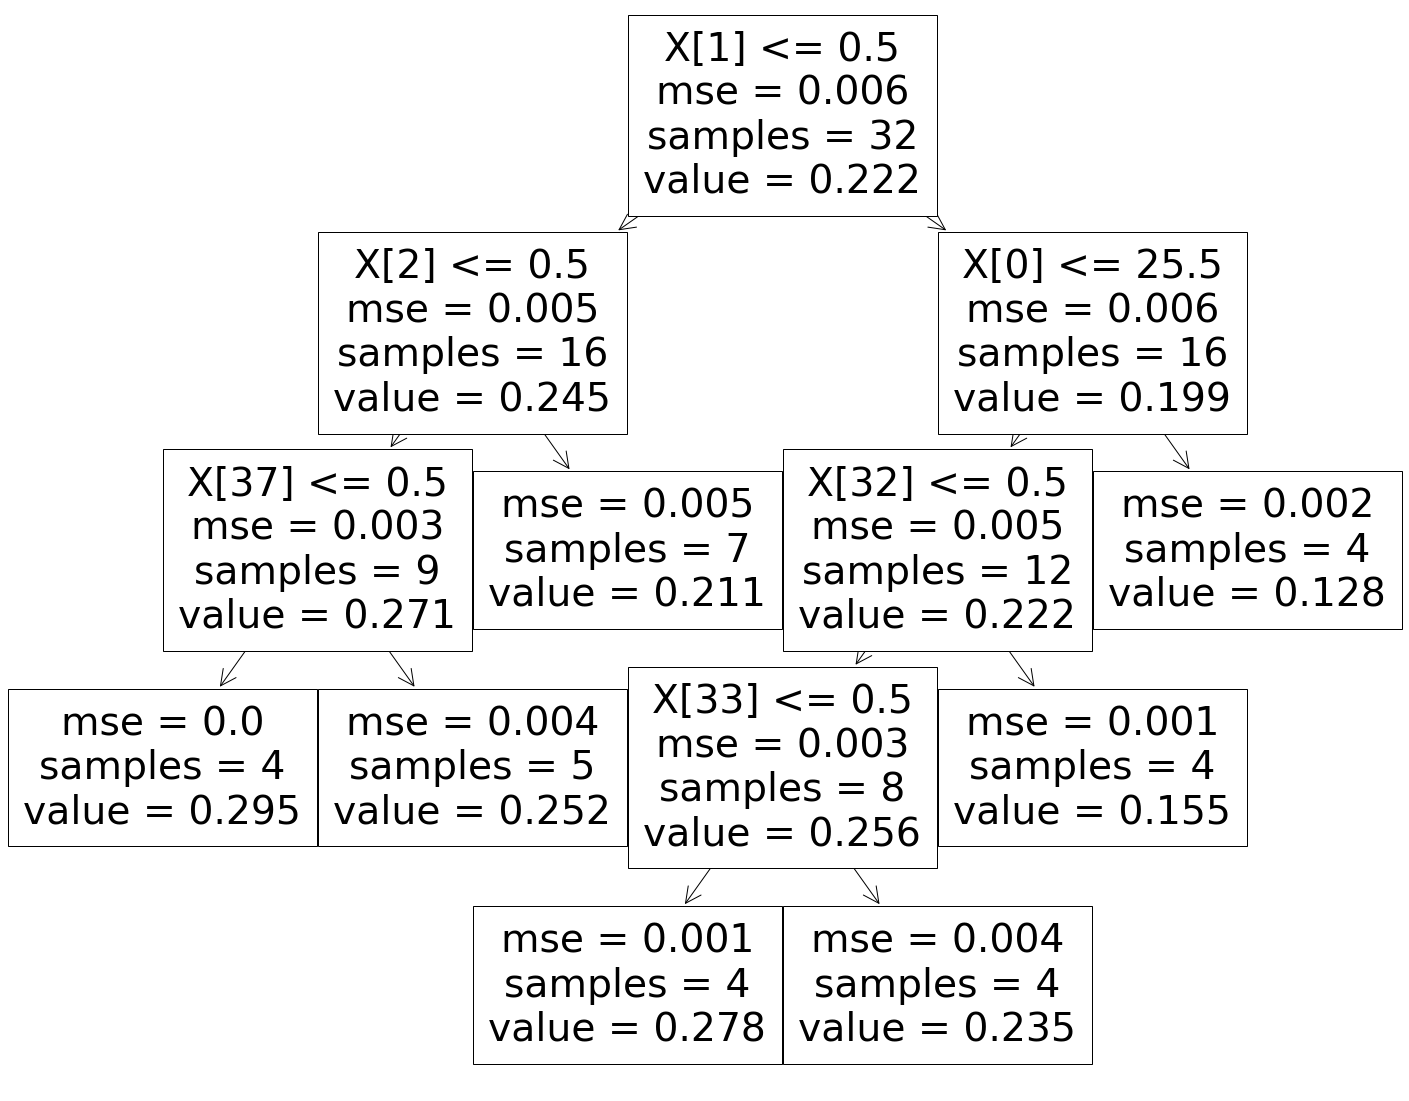

In [237]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)
              

# A - audio

In [238]:
studentsProfiles_A_df = studentsProfiles_df.drop(['MT','V'],axis =1)

In [239]:
A_X = studentsProfiles_A_df.drop('A',axis =1)
A_Y = studentsProfiles_A_df['A']
A_X_train, A_X_test, A_Y_train, A_Y_test = train_test_split(X,Y,test_size = 0.2)

In [240]:
clf = clf.fit(A_X_train,A_Y_train)

In [241]:
A_predictions = clf.predict(A_X_test)
A_predictions

array([0.232     , 0.15857143, 0.185     , 0.305     , 0.235     ,
       0.248     , 0.232     , 0.15857143, 0.15857143, 0.248     ])

In [242]:
n = A_predictions.shape[0]
k = A_X_train.shape[1]
adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)
print(rmse, r2, adj_r_sq)

0.07197814914320619 -1.2525451974267972 1.579225907909748


[Text(697.5, 996.6, 'X[2] <= 1.5\nmse = 0.004\nsamples = 40\nvalue = 0.23'),
 Text(418.5, 815.4000000000001, 'X[0] <= 45.5\nmse = 0.005\nsamples = 26\nvalue = 0.212'),
 Text(279.0, 634.2, 'X[38] <= 0.5\nmse = 0.005\nsamples = 21\nvalue = 0.202'),
 Text(139.5, 453.0, 'mse = 0.005\nsamples = 5\nvalue = 0.248'),
 Text(418.5, 453.0, 'X[30] <= 0.5\nmse = 0.004\nsamples = 16\nvalue = 0.188'),
 Text(279.0, 271.79999999999995, 'mse = 0.005\nsamples = 5\nvalue = 0.232'),
 Text(558.0, 271.79999999999995, 'X[0] <= 29.5\nmse = 0.002\nsamples = 11\nvalue = 0.168'),
 Text(418.5, 90.59999999999991, 'mse = 0.002\nsamples = 7\nvalue = 0.159'),
 Text(697.5, 90.59999999999991, 'mse = 0.001\nsamples = 4\nvalue = 0.185'),
 Text(558.0, 634.2, 'mse = 0.001\nsamples = 5\nvalue = 0.254'),
 Text(976.5, 815.4000000000001, 'X[0] <= 13.0\nmse = 0.001\nsamples = 14\nvalue = 0.264'),
 Text(837.0, 634.2, 'mse = 0.0\nsamples = 4\nvalue = 0.305'),
 Text(1116.0, 634.2, 'X[0] <= 35.5\nmse = 0.001\nsamples = 10\nvalue = 0

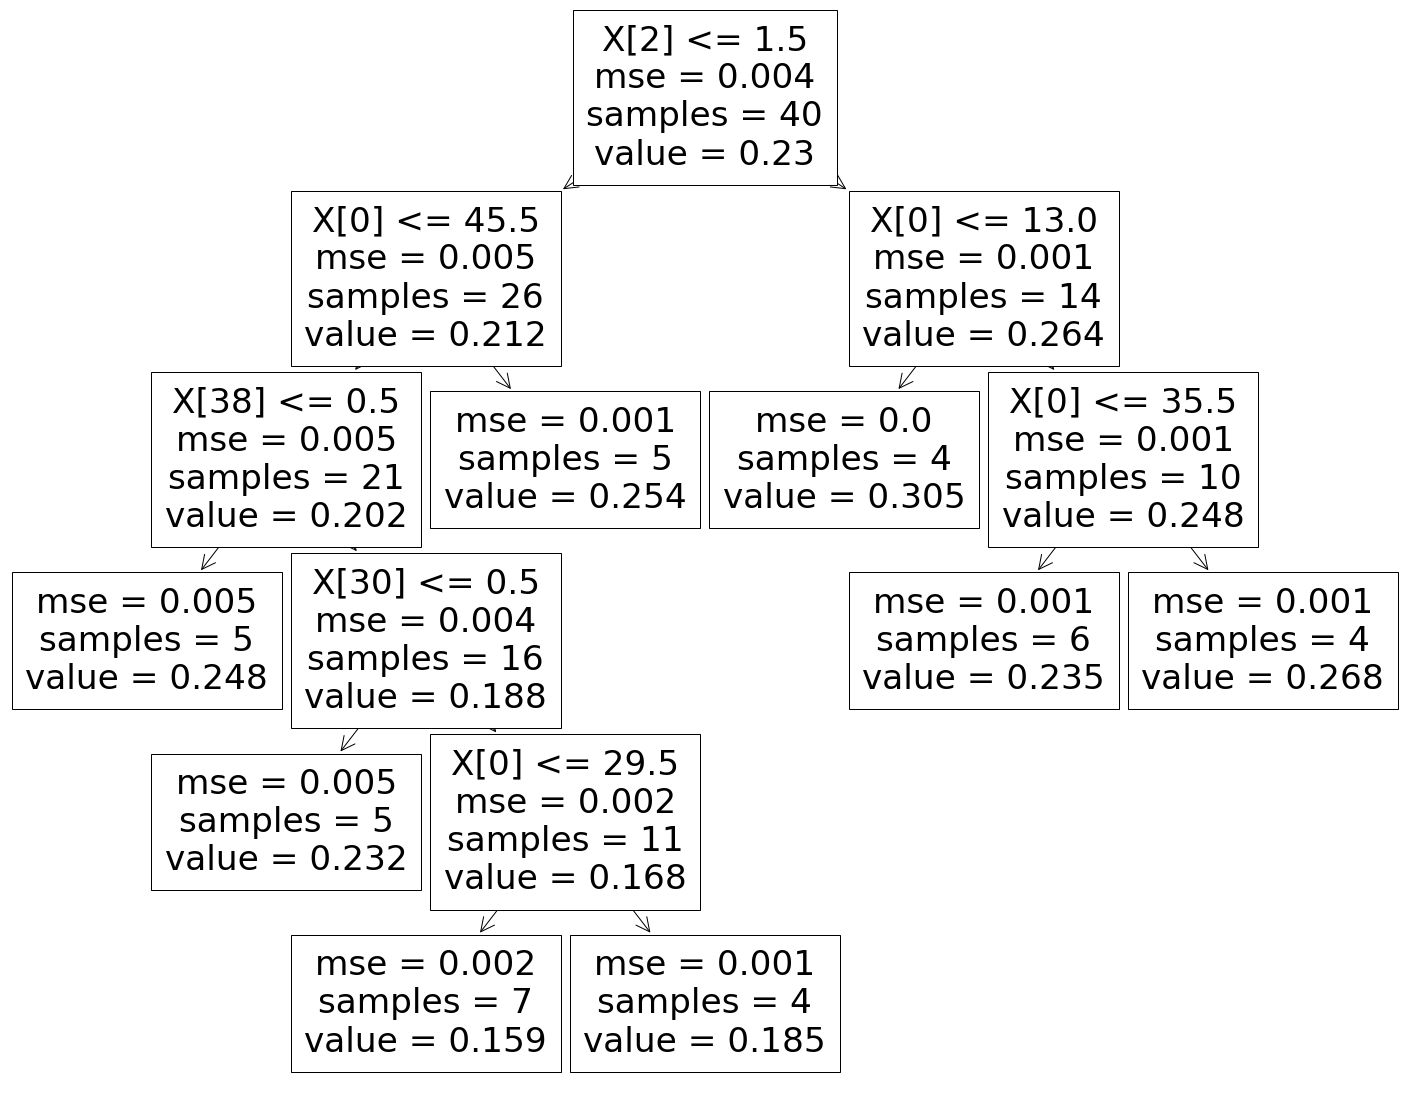

In [243]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)

# V - vision

In [244]:
studentsProfiles_V_df = studentsProfiles_df.drop(['MT','A'],axis =1)

In [245]:
V_X = studentsProfiles_V_df.drop('V',axis =1)
V_Y = studentsProfiles_V_df['V']
V_X_train, V_X_test, V_Y_train, V_Y_test = train_test_split(V_X,V_Y,test_size = 0.2)

In [246]:
clf = clf.fit(V_X_train,V_Y_train)

In [247]:
V_predictions = clf.predict(V_X_test)
V_predictions

array([0.25714286, 0.25714286, 0.268     , 0.268     , 0.215     ,
       0.215     , 0.188     , 0.175     ])

In [248]:
n = V_predictions.shape[0]
k = V_X_train.shape[1]
adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)
print(rmse, r2, adj_r_sq)

0.07197814914320619 -1.2525451974267972 1.4261571995131779


[Text(697.5, 978.48, 'X[36] <= 0.5\nmse = 0.004\nsamples = 32\nvalue = 0.225'),
 Text(523.125, 761.0400000000001, 'mse = 0.006\nsamples = 7\nvalue = 0.257'),
 Text(871.875, 761.0400000000001, 'X[40] <= 0.5\nmse = 0.004\nsamples = 25\nvalue = 0.216'),
 Text(697.5, 543.6, 'X[30] <= 0.5\nmse = 0.004\nsamples = 21\nvalue = 0.223'),
 Text(348.75, 326.1600000000001, 'X[2] <= 1.5\nmse = 0.004\nsamples = 10\nvalue = 0.206'),
 Text(174.375, 108.72000000000003, 'mse = 0.001\nsamples = 5\nvalue = 0.188'),
 Text(523.125, 108.72000000000003, 'mse = 0.005\nsamples = 5\nvalue = 0.224'),
 Text(1046.25, 326.1600000000001, 'X[1] <= 0.5\nmse = 0.003\nsamples = 11\nvalue = 0.239'),
 Text(871.875, 108.72000000000003, 'mse = 0.002\nsamples = 5\nvalue = 0.268'),
 Text(1220.625, 108.72000000000003, 'mse = 0.002\nsamples = 6\nvalue = 0.215'),
 Text(1046.25, 543.6, 'mse = 0.002\nsamples = 4\nvalue = 0.175')]

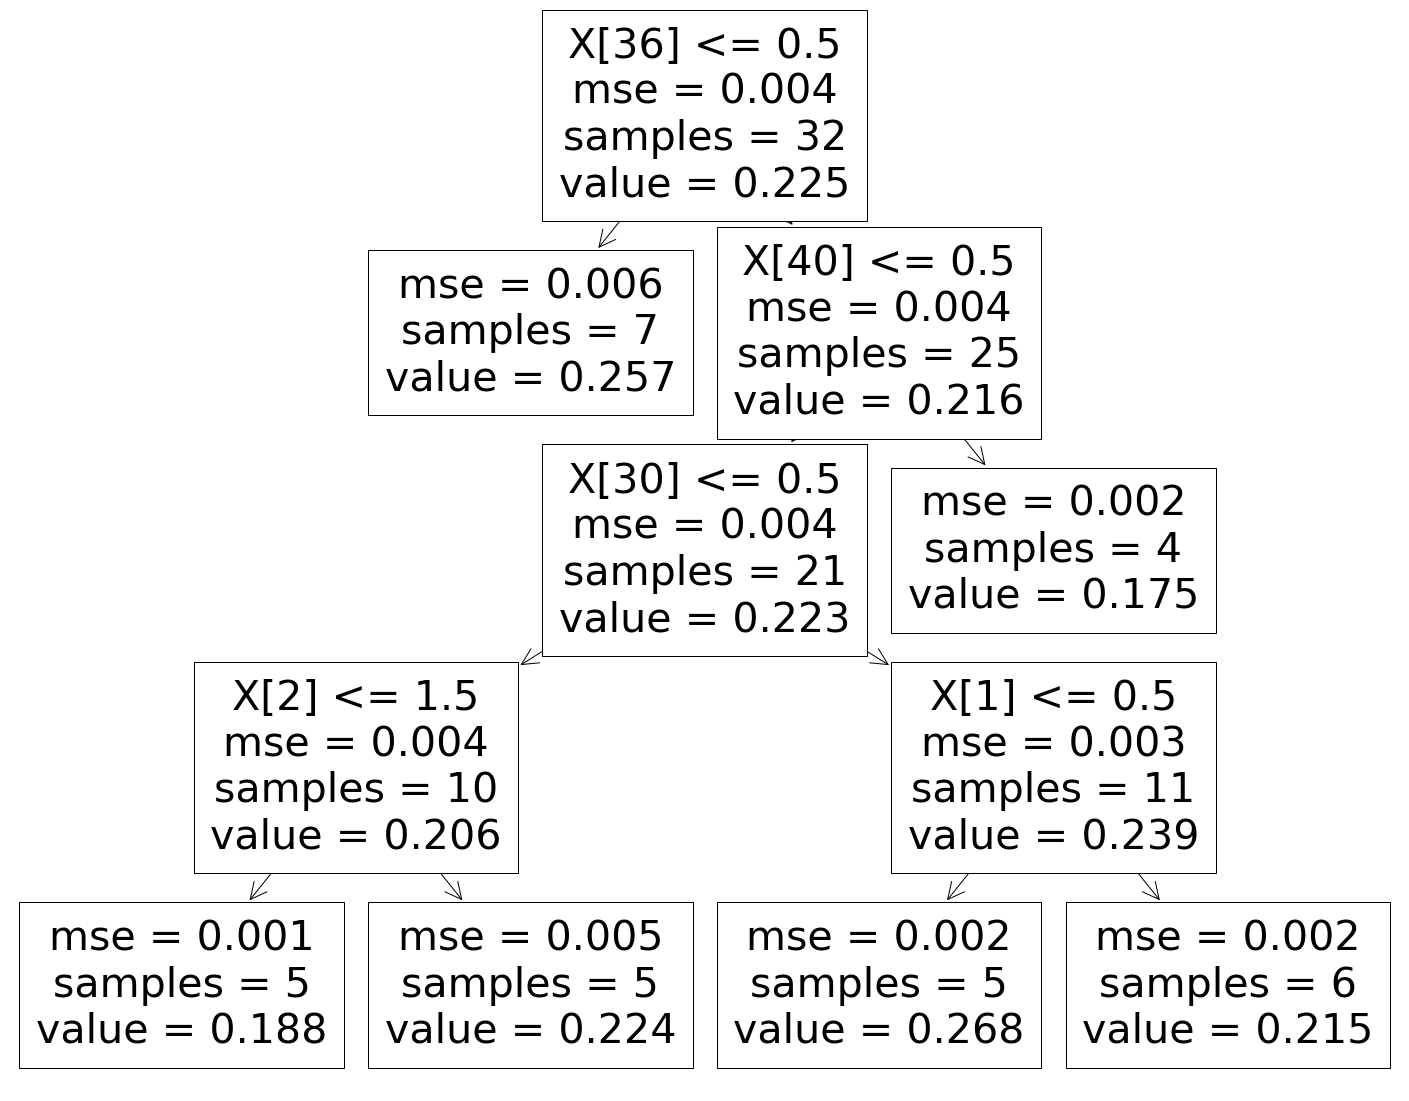

In [249]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)